# Boom Bikes: Bike-sharing prediction
### Overview:
Boom bikes wishes to understand the demand for shared bikes among the people across the nation post quarantine in order to be restart its operations in full swing and match the expected demand. The problem requires us to model the demand for shared bikes and analyze which variables are significant for this purpose and how well they describe the bike demand.

### Business objectives:
It is required to model the demand for shared bikes with the available independent variables. This will aid the management to understand precisely how the demands vary with different features. They can then, accordingly, manipulate the business strategy to meet the demand levels and meet the customers' expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Data dictionary:	    
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
    
The target variable is 'cnt' is the total rentals ( sum of 'casual' and 'registered') and we wish to see how well we can predict it using the other independent variables.

## Reading, understanding and visualizing the data

In [1]:
# Importing necessary libraries

import numpy as np
#print('numpy version\t:', np.__version__)
import pandas as pd
#print('pandas version\t:', pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the provided data file of bike sharing
# The data dictionary is used to manually understand the various features of data
bikeshare = pd.read_csv('day.csv')
print(bikeshare.shape)
bikeshare.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Get some insights from the data
# We print summary information of all attributes
bikeshare.info()
bikeshare.agg(['count','size','nunique','dtypes'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
size,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
nunique,730,730,4,2,12,2,7,2,3,498,689,594,649,605,678,695
dtypes,int64,object,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64


### We observe that there are no missing values

In [4]:
# More summary statistics of the data
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing columns irrelevant for prediction:
 - Instant is just the index and provdes no other useful information.
 - Date has already been processed into further columns.
 - Casual and registered together make up the predicted variable, total rentals, and hence cannot be used.

In [5]:
delete_cols = ['instant', 'dteday', 'casual', 'registered']
bikeshare.drop(delete_cols, axis = 1, inplace = True)

### Converting selected columns to categorical type
The following columns contain numeric data, but are actually categorical:
 - season
 - year
 - month
 - holiday
 - weekday
 - workingday
 - weathersit

In [6]:
bikeshare.season = bikeshare.season.astype("category")
bikeshare.yr = bikeshare.yr.astype("category")
bikeshare.mnth = bikeshare.mnth.astype("category")
bikeshare.holiday = bikeshare.holiday.astype("category")
bikeshare.weekday = bikeshare.weekday.astype("category")
bikeshare.workingday = bikeshare.workingday.astype("category")
bikeshare.weathersit = bikeshare.weathersit.astype("category")

### Visualizing the pair-wise correlation between numerical attributes

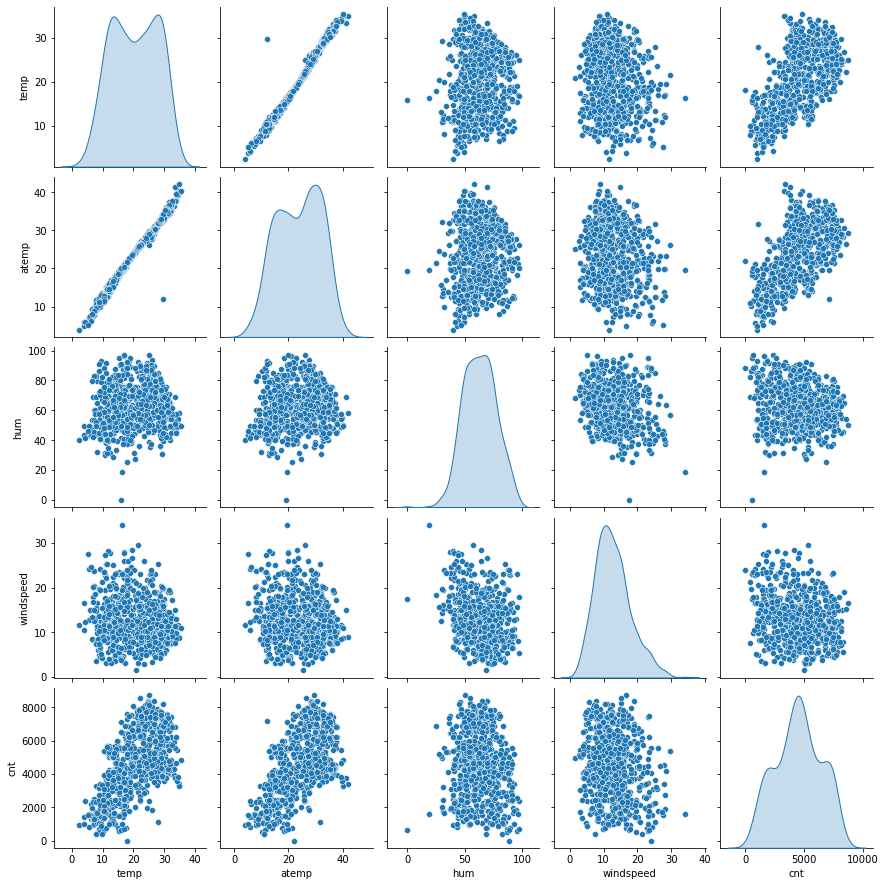

In [7]:
sns.pairplot(bikeshare, diag_kind = 'kde')

### Observations from Pair-plots
 - Total rentals seems to vary linearly to temperature and feeling temperature.
 - Temperature and feeling temperature are highly correlated with each other as expected.
 
Therefore, using a linear regression model seems to be justified. 

### Visualizing the trend in total rentals with the categorical variables
Box plots for the 7 categorical variables have been drawn.

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

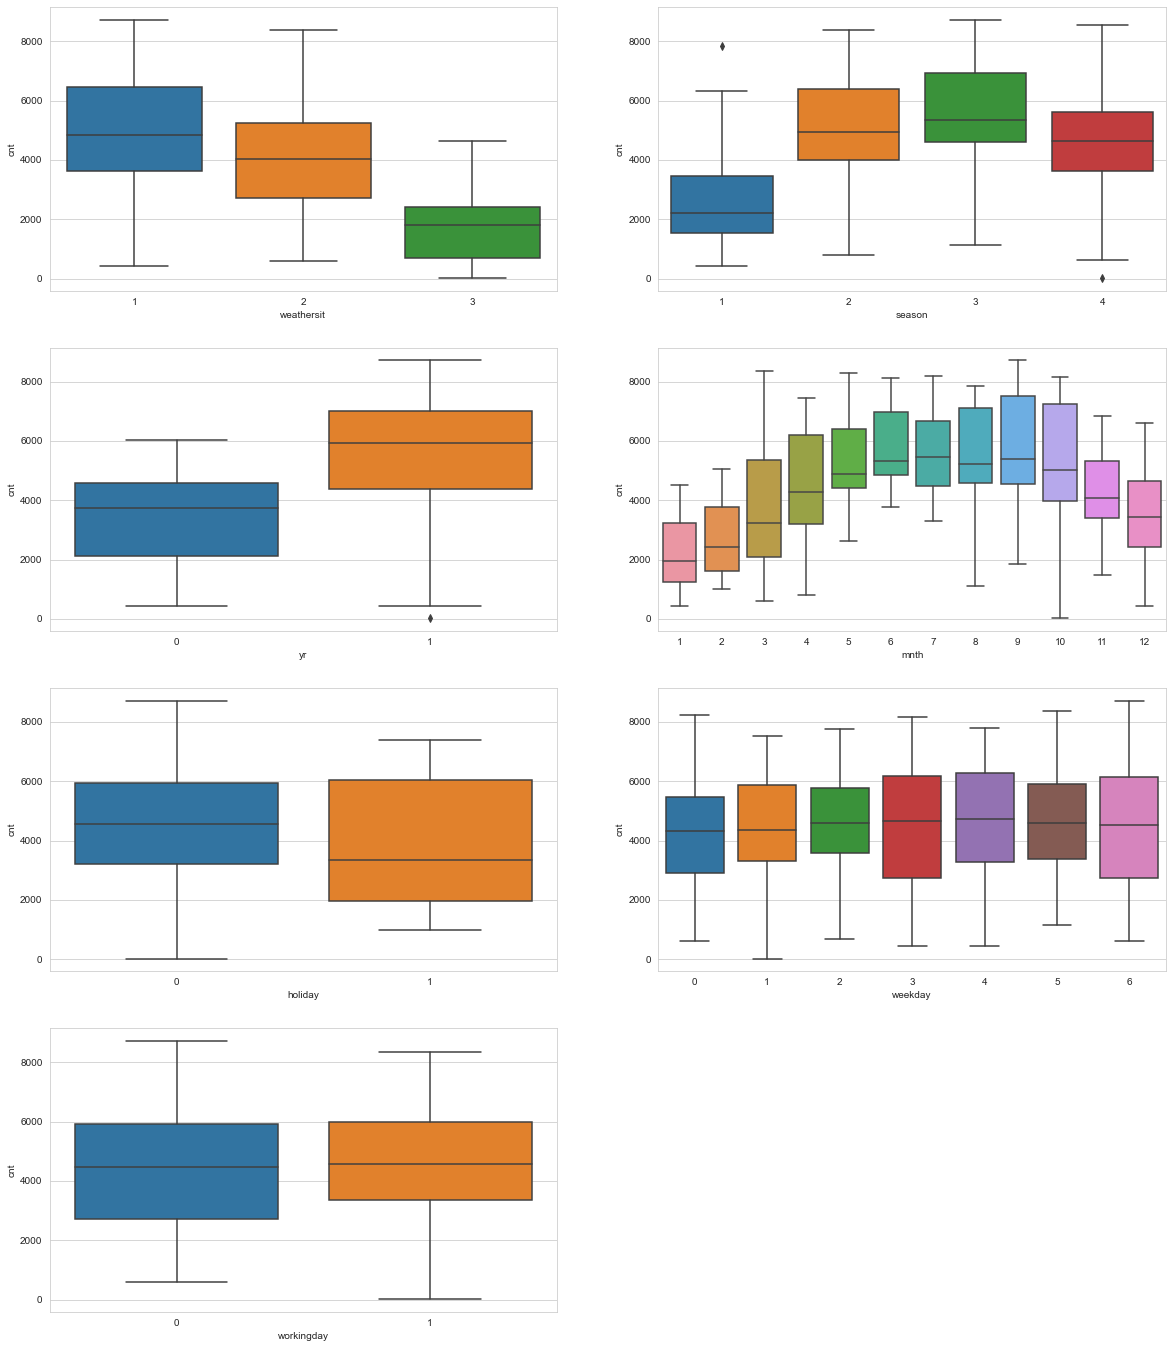

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize = (20, 24))
plt.subplot(4, 2, 1)
sns.boxplot(x='weathersit', y='cnt', data=bikeshare)
plt.subplot(4, 2, 2)
sns.boxplot(x='season', y='cnt', data=bikeshare)
plt.subplot(4, 2, 3)
sns.boxplot(x='yr', y='cnt', data=bikeshare)
plt.subplot(4, 2, 4)
sns.boxplot(x='mnth', y='cnt', data=bikeshare)
plt.subplot(4, 2, 5)
sns.boxplot(x='holiday', y='cnt', data=bikeshare)
plt.subplot(4, 2, 6)
sns.boxplot(x='weekday', y='cnt', data=bikeshare)
plt.subplot(4, 2, 7)
sns.boxplot(x='workingday', y='cnt', data=bikeshare)

### Observations from the box plots
 - The weather variable, as expected, shows demand going down sharply with bad weather.
 - The season variable shows that summer and fall have higher demand.
 - 2019 year sees a significant boost in rentals.
 - Monthly trend is quite similar to the seasonal variations and this is expected.
 - The median demand for rentals dips on holidays.
 
The rest of the variables do not exhibit any clearly identifiable trend.

## Preparing data for linear regression

### Encoding categorical variables as dummy variables
 - A categorical variable with p values can be encoded with (p-1) binary dummy variables.
 - First it splits such a variable into p binary variables. Next, the column for the first such variable is deleted.
 - The original variable is also deleted.

In [9]:
bikeshare = pd.get_dummies(bikeshare, drop_first = True)
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   atemp         730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   cnt           730 non-null    int64  
 5   season_2      730 non-null    uint8  
 6   season_3      730 non-null    uint8  
 7   season_4      730 non-null    uint8  
 8   yr_1          730 non-null    uint8  
 9   mnth_2        730 non-null    uint8  
 10  mnth_3        730 non-null    uint8  
 11  mnth_4        730 non-null    uint8  
 12  mnth_5        730 non-null    uint8  
 13  mnth_6        730 non-null    uint8  
 14  mnth_7        730 non-null    uint8  
 15  mnth_8        730 non-null    uint8  
 16  mnth_9        730 non-null    uint8  
 17  mnth_10       730 non-null    uint8  
 18  mnth_11       730 non-null    

In [10]:
bikeshare.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### Splitting the data into training and test sets

In [11]:
from sklearn.model_selection import train_test_split
bikeshare_train, bikeshare_test = train_test_split(bikeshare, train_size = 0.7, random_state = 100)
print(bikeshare_train.shape)
print(bikeshare_test.shape)

(510, 30)
(220, 30)


### Rescaling all numerical variables

In [12]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bikeshare_train[num_vars] = scalar.fit_transform(bikeshare_train[num_vars])
bikeshare_train.describe()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,0.507843,0.066667,...,0.025490,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.676471,0.345098,0.029412
std,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,0.500429,0.249689,...,0.157763,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.468282,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualizing correlation among the variables
The heatmap shows which variables have multicollinearity and the variables which have high correlation with the target variable

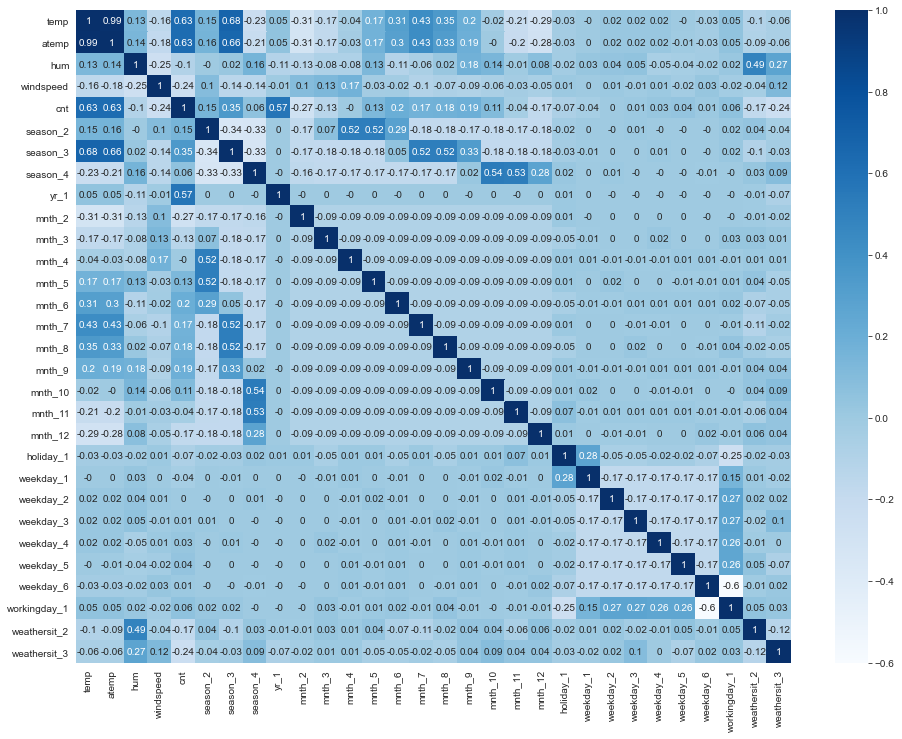

In [13]:
# We check the correlation coefficients to examine which variables are highly correlated
corr = bikeshare.corr().round(2)
plt.figure(figsize = (16, 12))
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.show()

### Identifying variables that are most highly correlated to the target variable

In [14]:
#If we want to see how features are related to the target variable we
# can also write the code below to obtain the feature correlation 
#coefficients with the target variable:

corr['cnt'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,cnt,1.00
1,temp,0.63
2,atemp,0.63
3,yr_1,0.57
4,season_3,0.35
5,mnth_6,0.20
6,mnth_9,0.19
7,mnth_8,0.18
8,mnth_7,0.17
9,season_2,0.15


## Model Building

In [15]:
# Diving into X_train and y_train for model building
y_train = bikeshare_train.pop('cnt')
X_train = bikeshare_train

### Model building using RFE
We use the "Recursive Feature Elimination" technique coupled with the linear regression model from Scikit-Learn to build a model using top 15 features.

In [16]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [17]:
# Running RFE with to identify top n features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [18]:
# Features marked as True are selected. Rankings are given for all features.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('holiday_1', True, 1),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [19]:
# Columns to be chosen
cols = list(X_train.columns[rfe.support_])
cols

['temp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'yr_1',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'holiday_1',
 'weekday_6',
 'workingday_1',
 'weathersit_2',
 'weathersit_3']

### Building a linear model using Statsmodels

In [20]:
import statsmodels.api as sm

### Model 1

In [21]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [22]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.17e-191
Time:                        19:47:48   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790   

### The p-value of the column season_3 is high (>0.05) and makes this attribute insignificant. Hence it would be removed from the model.

### Model 2

In [23]:
X_train_rfe = X_train_rfe.drop(['season_3'], axis = 1)
cols.remove('season_3')

In [24]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          8.70e-192
Time:                        19:47:48   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769   

### The p-value of all features is within limit (<0.05). Hence we check the VIF of the features.

### Calculating the VIF for features in Model 2

In [25]:
# Calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.47
12,workingday_1,1.88
2,hum,1.87
11,weekday_6,1.79
5,season_4,1.71
1,temp,1.59
13,weathersit_2,1.56
9,mnth_10,1.49
7,mnth_8,1.46
4,season_2,1.38


### The VIF of all features is < 5. Hence there is no need to drop any more features and this would be our final model.
Model statistics:
 - R-squared: 0.848
 - Adj. R-squared: 0.843
 - Prob (F-statistic): 8.70e-192
 
The R-squared value shows that our model is able to explain 84.8 percent of the variance in the training data. This is considered good. Also the nearly zero probability of the F-statistic shows that we can have a high degree of confidence in our model.

## Residual analysis: Training data
The residual (error) is obtained as, target value - predicted value.
A linear regression model has the following underlying assumptions:
 1. Errors must follow a normal distribution with zero mean.
 2. Errors are independent of each other.
 3. Errors have constant variance.

In [26]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

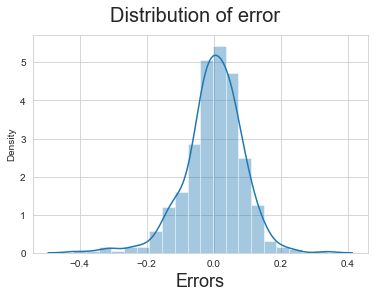

In [27]:
# Checking distribution of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Distribution of error', fontsize = 20)      # Plot heading 
plt.xlabel('Errors', fontsize = 18)                       # X-label

### The distribution is approximately normal with zero mean.

Text(0, 0.5, 'Errors')

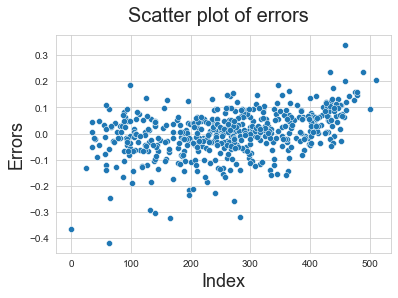

In [28]:
# Checking variance of errors
fig = plt.figure()
sns.scatterplot()
sns.scatterplot(x = y_train*len(y_train), y = (y_train - y_train_pred))
fig.suptitle('Scatter plot of errors', fontsize = 20)      # Plot heading 
plt.xlabel('Index', fontsize = 18)                         # X-label
plt.ylabel('Errors', fontsize = 18)                        # Y-label

### The scatterplot shows:
 - The variance is roughly constant.
 - There are no patterns and hence the errors appear independent.
 
Therefore all three assumptions of linear regression are met by the model.

## Predictions on the test data & Model Evaluation

In [29]:
# Transforming the test data with scaling learnt from the training data.
bikeshare_test[num_vars] = scalar.transform(bikeshare_test[num_vars])

In [30]:
# Preparing X_test and y_test
y_test = bikeshare_test.pop('cnt')
X_test = bikeshare_test[cols]

# Adding a constant variable 
X_test = sm.add_constant(X_test)

# Using the model to make predictions
y_test_pred = lm.predict(X_test)

Text(0, 0.5, 'y_test_pred')

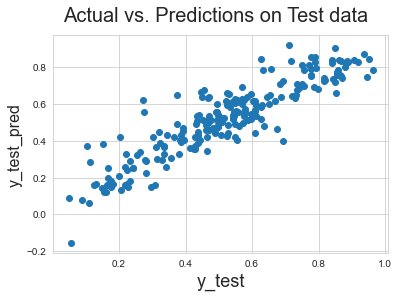

In [31]:
# Plotting y_test and y_test_pred to see spread
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs. Predictions on Test data', fontsize=20)       # Title
plt.xlabel('y_test', fontsize=18)                                     # x label
plt.ylabel('y_test_pred', fontsize=16)                                # y label

### Computing the R-squared value for test data

In [32]:
# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
print("The r2 score is", r2)

The r2 score is 0.8149002944843474


### The R-squared scores:
 - Training data: 0.848
 - Test data: 0.815
 
These values are relatively close and this shows that the model is generalizing well from the training data to the test data.

### Computing the adjusted R-squared value for test data

In [33]:
n = len(y_test) # size of test set
p = 14 # number of features
adjusted_r2 = 1 - ((1 - r2)*(n-1)/(n-p-1))
adjusted_r2

0.8022593389857174

### The adjusted R-squared scores:
 - Training data: 0.843
 - Test data: 0.802
 
Again, these values are relatively close.

## Model Interpretation: The final model can be described as follows

The coefficients of the final model with 14 variables (note that const is just the coefficient of the column with 1's).
<code>
 - constant                       0.1948
 - temperature                    0.5309
 - humidity                      -0.1708
 - windspeed                     -0.1858
 - summer                         0.1049
 - winter                         0.1349
 - year_2019                      0.2292
 - month_8                         0.0557
 - month_9                         0.1252
 - month_10                        0.0385
 - holiday                       -0.0557
 - sunday                         0.0527
 - workingday                     0.0442
 - weathersit_2_misty            -0.0568
 - weathersit_3_lightrainsnow    -0.2470 </code>

<em> TotalRentals = 0.1948 + 0.5309 x temperature - 0.1708 x humidity - 0.1858 x windspeed + 0.1049 x summer + 0.1349 x winter + 0.2292 x year_2019 + 0.0557 x month_8 + 0.1252 x month_9 + 0.0385 x month_10 - 0.0557 x holiday + 0.0527 x sunday + 0.0442 x workingday - 0.0568 x weathersit_2_misty - 0.2470 x weathersit_3_lightsnowrain </em>


 ### The following are the top few features that are crucial to the understanding the demand:
  1. Temperature: Demand grows significantly with temperature
  2. Weather situation: Good weather leads to high demand while snow and rain cause a sharp decline
  3. Year: 2019 sees a strong rise in demand. This only shows a possibility of higher demand in coming years.
  4. Month and season: The season variable shows that summer and fall have higher demand. The months show a trend similar to that seasons.
  5. Windspeed: High winds mean a small decline in demand.
  6. Humidity: High humidity also causes a small decline in demand.
  
The effect of other the categorical variables has been described earlier. Categorical variables are split up into multiple dummy variables hence their effect must be understood taking that into consideration.

## Conclusions and remarks

 1. Temperature has a strong linear relation with the rental count. Higher temperatures mean higher demand.
 
 2. The day-to-day weather situation is an immediate local determiner of the demand. A pleasant weather is linked to higher demand while rain and snow cause the demand to plummet sharply.

 3. Seasonal dips in demand in spring and winter are times where they may work on some innovative ideas to increase demand.
 
 4. While we only have data for 2 years, it seems that there should be a substantial rise in demand based on the jump from the starting year, 2018, to 2019. The company should spend some of their efforts in popularizing their brand and also scaling up to handle any demand.
 
 5. The strong trends in seasonal or day-to-day weather conditions should be used to manage downtime and surges effectively. Perhaps spreading to a wider area would lower local demand fluctuations. Seasonal shifts can be used to upgrade and maintain bikes. 
 
 
